In [0]:
import numpy as np 
import keras  
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Input, BatchNormalization, Activation, Dropout, Flatten, Dense 
from keras import backend as k 
import pandas as pd
import tensorflow as tf
from keras.initializers import Constant
from keras.callbacks import LearningRateScheduler
import random

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

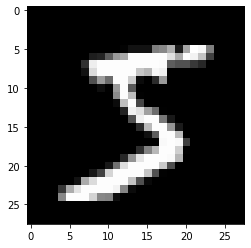

In [140]:
pyplot.imshow(x_train[0], cmap=pyplot.get_cmap('gray'))
pyplot.show()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


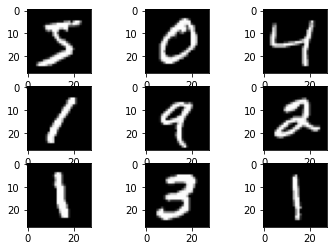

In [141]:
# Display the dataset
from matplotlib import pyplot
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()




In [160]:
print(x_train[0].shape)
pd.DataFrame(x_train[0]).head(28)

(28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [161]:
NUM_CLASSES = 10
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

print("x_train.shape = {}, y_train.shape = {}".format(x_train.shape, y_train.shape))
print("x_test.shape = {}, y_test.shape = {}".format(x_test.shape, y_test.shape))

x_train.shape = (60000, 28, 28, 1), y_train.shape = (60000, 10)
x_test.shape = (10000, 28, 28, 1), y_test.shape = (10000, 10)


In [0]:
inputs = Input(shape=(28, 28, 1), name='input')

x = Conv2D(24, kernel_size=(6, 6), strides=1)(inputs)
x = BatchNormalization(scale=False, beta_initializer=Constant(0.01))(x)
x = Activation('relu')(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(48, kernel_size=(5, 5), strides=2)(x)
x = BatchNormalization(scale=False, beta_initializer=Constant(0.01))(x)
x = Activation('relu')(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(64, kernel_size=(4, 4), strides=2)(x)
x = BatchNormalization(scale=False, beta_initializer=Constant(0.01))(x)
x = Activation('relu')(x)
x = Dropout(rate=0.25)(x)

x = Flatten()(x)
x = Dense(200)(x)
x = BatchNormalization(scale=False, beta_initializer=Constant(0.01))(x)
x = Activation('relu')(x)
x = Dropout(rate=0.25)(x)

In [0]:
predications = Dense(NUM_CLASSES, activation='softmax', name='output')(x)
model = Model(inputs=inputs, outputs=predications)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [165]:

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 23, 23, 24)        888       
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 24)        72        
_________________________________________________________________
activation_1 (Activation)    (None, 23, 23, 24)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 24)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 48)        28848     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 48)        144 

In [169]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.2211 - accuracy: 0.9324
Epoch 2/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.0660 - accuracy: 0.9801
Epoch 3/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.0507 - accuracy: 0.9844
Epoch 4/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0417 - accuracy: 0.9868
Epoch 5/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0349 - accuracy: 0.9894
Epoch 6/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0327 - accuracy: 0.9897
Epoch 7/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.0308 - accuracy: 0.9905
Epoch 8/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0263 - accuracy: 0.9918
Epoch 9/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0250 - accuracy: 0.9920
Epoch 10/20
60000/60000 [============

In [170]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('loss=', score[0]) 
print('accuracy=', score[1])

loss= 0.01692226945306611
accuracy= 0.9943000078201294


In [0]:
model.save('handwrittendigit.h5')

In [173]:
converter = tf.lite.TFLiteConverter.from_keras_model_file('handwrittendigit.h5')
tflite_model = converter.convert()
open('handwrittendigit.tflite', 'wb').write(tflite_model)

AttributeError: ignored